In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df2 = df.copy()

In [5]:
df.drop(['petal_length','petal_width'], inplace= True, axis = 1)

In [6]:
df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


<h2>Exploratory Data Analysis</h2>

Text(0.5, 1.0, 'Histogram of the target variable')

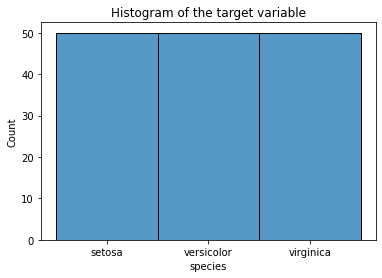

In [7]:
sns.histplot(df['species'])
plt.title('Histogram of the target variable')

<Figure size 432x432 with 0 Axes>

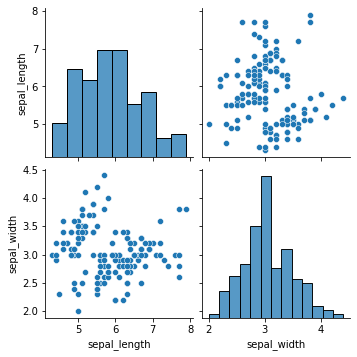

In [8]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df)

* Here, we can see that the plot is almost normally distributed for both the features

<h2>PCA FOR REDUCING 2D to 1D</h2>

Text(0.5, 1.0, 'Scatterplot before reducing the dimensions')

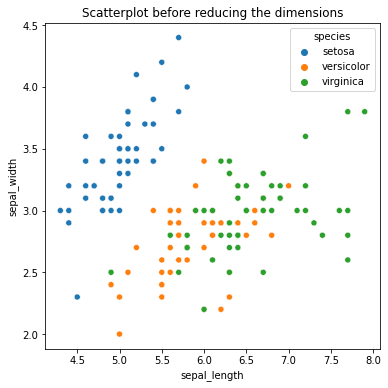

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='sepal_length',y='sepal_width', data=df, hue = 'species')
plt.title("Scatterplot before reducing the dimensions")

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['species'])
df['Species'] = encoded

In [11]:
df.drop(['species'],axis=1,inplace=True)

In [12]:
df.head()

,sepal_length,sepal_width,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [13]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=1)

In [14]:
x_pca = pca_model.fit_transform(df)

In [15]:
component_df = pd.DataFrame(data=x_pca, columns=['component_value'])
component_df[:5]

,component_value
0,-1.280815
1,-1.354709
2,-1.520858
3,-1.577574
4,-1.363889


In [16]:
component_df.shape

(150, 1)

In [17]:
reduced_df = pd.concat([component_df,df['Species']],axis=1)
reduced_df[:5]

,component_value,Species
0,-1.280815,0
1,-1.354709,0
2,-1.520858,0
3,-1.577574,0
4,-1.363889,0


Text(0.5, 1.0, 'Histogram after reducing the dimensions')

<Figure size 360x360 with 0 Axes>

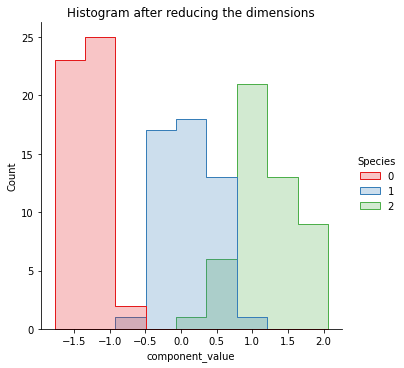

In [18]:
plt.figure(figsize=(5,5))
sns.displot(reduced_df, x="component_value", hue="Species", element="step", palette='Set1')
plt.title('Histogram after reducing the dimensions')

<h2>PCA FOR REDUCING 3D to 2D</h2>

In [19]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Will be considering sepal_length, sepal_width, petal_length as features

In [20]:
df2.drop(['petal_width'],inplace=True,axis=1)

In [21]:
df2.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df2['species'])
df2['Species'] = encoded

df2.drop(['species'],axis=1,inplace=True)

In [23]:
df2.head()

,sepal_length,sepal_width,petal_length,Species
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [24]:
# scaling the values present in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)

In [25]:
scaled_df = pd.DataFrame(scaled_features, columns = df2.columns)

In [26]:
scaled_df[:5]

,sepal_length,sepal_width,petal_length,Species
0,-0.900681,1.019004,-1.340227,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.224745
2,-1.385353,0.328414,-1.397064,-1.224745
3,-1.506521,0.098217,-1.283389,-1.224745
4,-1.021849,1.249201,-1.340227,-1.224745


Text(0.5, 0.92, 'Plot before reducing the dimensions')

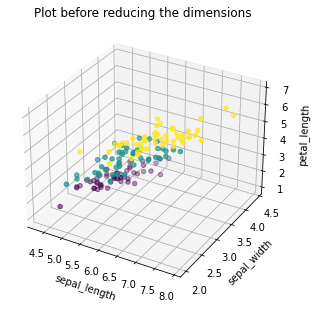

In [27]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection = '3d')

x = df2['sepal_length']
y = df2['sepal_width']
z = df2['petal_length']

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")

ax.scatter(x, y, z, c=df2['Species'])

plt.title("Plot before reducing the dimensions")

In [28]:
pca_model = PCA(n_components=2)
x_pca= pca_model.fit_transform(df2)
component_df = pd.DataFrame(data=x_pca, columns=['component_value 1','component_value 2'])
component_df[:5]

,component_value 1,component_value 2
0,-2.685487,0.298473
1,-2.713845,-0.185127
2,-2.887395,-0.168736
3,-2.744465,-0.329862
4,-2.729760,0.300692


In [29]:
component_df.shape

(150, 2)

In [30]:
reduced_df = pd.concat([component_df,df2['Species']],axis=1)
reduced_df[:5]

,component_value 1,component_value 2,Species
0,-2.685487,0.298473,0
1,-2.713845,-0.185127,0
2,-2.887395,-0.168736,0
3,-2.744465,-0.329862,0
4,-2.729760,0.300692,0


Text(0.5, 1.0, 'Plot after reducing the dimensions')

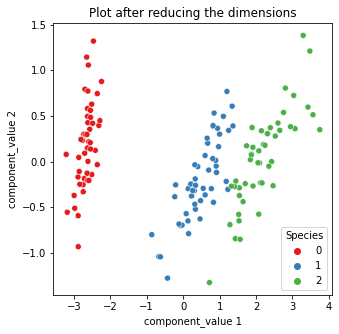

In [31]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = reduced_df, x="component_value 1", y="component_value 2", hue="Species", palette='Set1')
plt.title('Plot after reducing the dimensions')

<h2>ANALYSIS</h2>

* Let's create a ML model and train with original data and reduced data
* Then we compare with the amount of time the model takes to train and also the accuracy

In [32]:
# Original data with 3 dimensions
df2.head()

,sepal_length,sepal_width,petal_length,Species
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [33]:
# reduced data with 2 dimensions
reduced_df.head()

,component_value 1,component_value 2,Species
0,-2.685487,0.298473,0
1,-2.713845,-0.185127,0
2,-2.887395,-0.168736,0
3,-2.744465,-0.329862,0
4,-2.729760,0.300692,0


<h3>Analysis for Original Data</h3>

In [34]:
X = df2[['sepal_length','sepal_width','petal_length']]
y = df2['Species']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [36]:
# let's consider a decision tree model
from sklearn.tree import DecisionTreeClassifier
original_model = DecisionTreeClassifier().fit(X_train, y_train)
original_pred = original_model.predict(X_test)

In [37]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,original_pred))
print(confusion_matrix(y_test, original_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.81      1.00      0.90        13
           2       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

[[19  0  0]
 [ 0 13  0]
 [ 0  3 10]]


<h3>Analysis for Reduced Data</h3>

In [42]:
X = reduced_df[['component_value 1','component_value 2']]
y = reduced_df['Species']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [47]:
# let's consider a decision tree model
from sklearn.tree import DecisionTreeClassifier
reduced_model = DecisionTreeClassifier().fit(X_train, y_train)
reduced_pred = reduced_model.predict(X_test)

In [48]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,reduced_pred))
print(confusion_matrix(y_test, reduced_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


* we see that the reduced data is performing well